# 2 - Linear Model Training Notebook 

In [13]:
import sys  
sys.path.insert(1, '/Users/simon/Documents/II/Dissertation/src')
import pandas as pd
import misc

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load the data

In [14]:
df = misc.load_processed_dataset("aapl", "2018-01-01", "2023-01-1")

Feature selection

In [15]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Close Forecast', 'Close_T-1', 'Close_T-2', 'Close_T-5', 'SMA_10',
       'SMA_20', 'SMA_50', 'EMA_10', 'EMA_20', 'EMA_50', 'RSI_14',
       'upper_band', 'middle_band', 'lower_band', 'macd', 'macdsignal',
       'macdhist', 'OBV', 'ADX', 'AD', 'Aroon_down', 'Aroon_up', 'SlowK',
       'SlowD', 'Williams %R', 'pct_change', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'S&P Close']
df = df[features]

Dataset splitting

In [36]:
X_train, X_test, Y_train, Y_test = misc.create_train_test_set(df, 0.8, verbose=True)

Historical Stock Data length is -  1259
Training Set length -  1007
Test Set length -  251
(1007, 40) (252, 40)
(1007,) (252,)


In [28]:
X_train.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_T-1,Close_T-2,Close_T-5,...,Williams %R,pct_change,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,S&P Close
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02 05:00:00,40.175158,40.680417,39.962664,40.670971,102223600,0.0,0.0,39.955585,40.392380,41.320259,...,-61.905020,0.017905,1,1,1,2018,2,2,1,2695.810059
2018-01-03 05:00:00,40.734722,41.211650,40.600146,40.663891,118071600,0.0,0.0,40.670971,39.955585,40.271961,...,-62.280802,-0.000174,2,1,1,2018,3,3,1,2713.060059
2018-01-04 05:00:00,40.737080,40.956657,40.628475,40.852772,89738400,0.0,0.0,40.663891,40.670971,40.279041,...,-52.255774,0.004645,3,1,1,2018,4,4,1,2723.989990
2018-01-05 05:00:00,40.949571,41.405247,40.857492,41.317890,94640000,0.0,0.0,40.852772,40.663891,40.392380,...,-27.569190,0.011385,4,1,1,2018,5,5,1,2743.149902
2018-01-08 05:00:00,41.164429,41.461916,41.065263,41.164429,82271200,0.0,0.0,41.317890,40.852772,39.955585,...,-35.714297,-0.003714,0,1,1,2018,8,8,2,2747.709961


Model creation and training (Variant 1)

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)  
preds = model.predict(X_test)
preds = pd.Series(preds, index=Y_test.index)

Visualisation

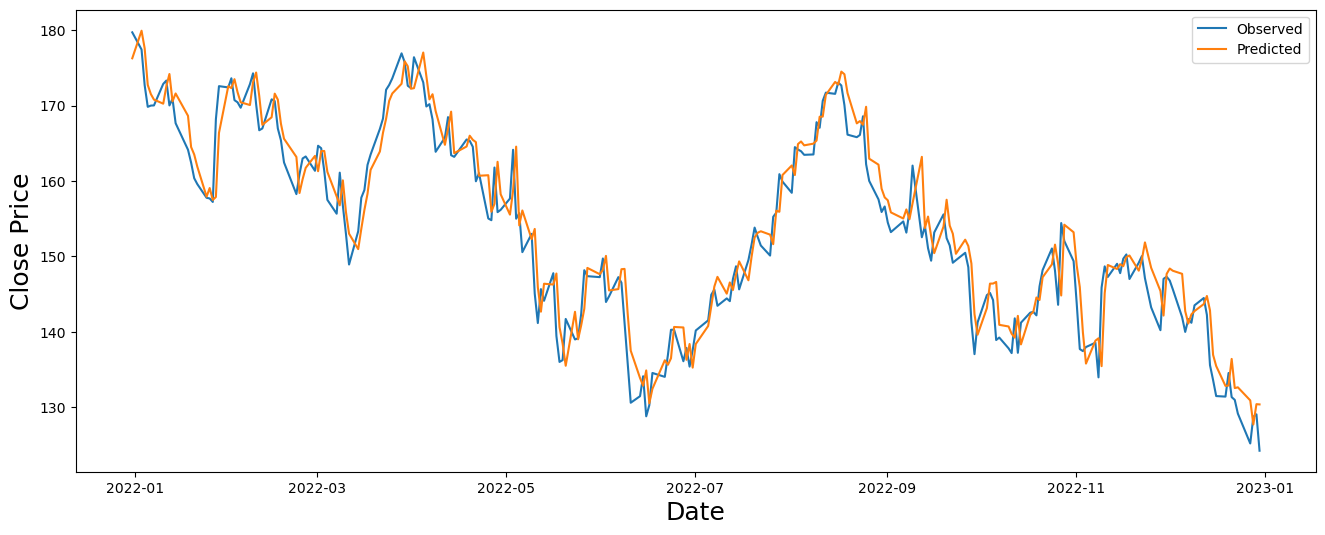

In [18]:
misc.plot(preds, Y_test)

Model evaluation

In [19]:
misc.evaluate(preds, Y_test, verbose=True)

R^2: 0.9226277384019421
MSE: 12.752608601435956
RMSE: 3.5710794728535453
MAE: 2.858138210333943
MAPE: 1.8953666368935456


(0.9226277384019421,
 12.752608601435956,
 3.5710794728535453,
 2.858138210333943,
 1.8953666368935456)

Model creation and training (Variant 1)

In [52]:
Xs = pd.concat([X_train, X_test])
Ys = pd.concat([Y_train, Y_test])

def linear_model_N(N):
    preds = []
    model = LinearRegression(fit_intercept=True)
    for i in range(len(X_train), len(Xs)):
        model.fit(Xs.iloc[i-N:i], Ys.iloc[i-N:i])
        pred = model.predict(Xs.iloc[i:i+1])
        preds.append(pred[0])
    preds = pd.Series(preds, index=Y_test.index)
    return preds

Visualisation

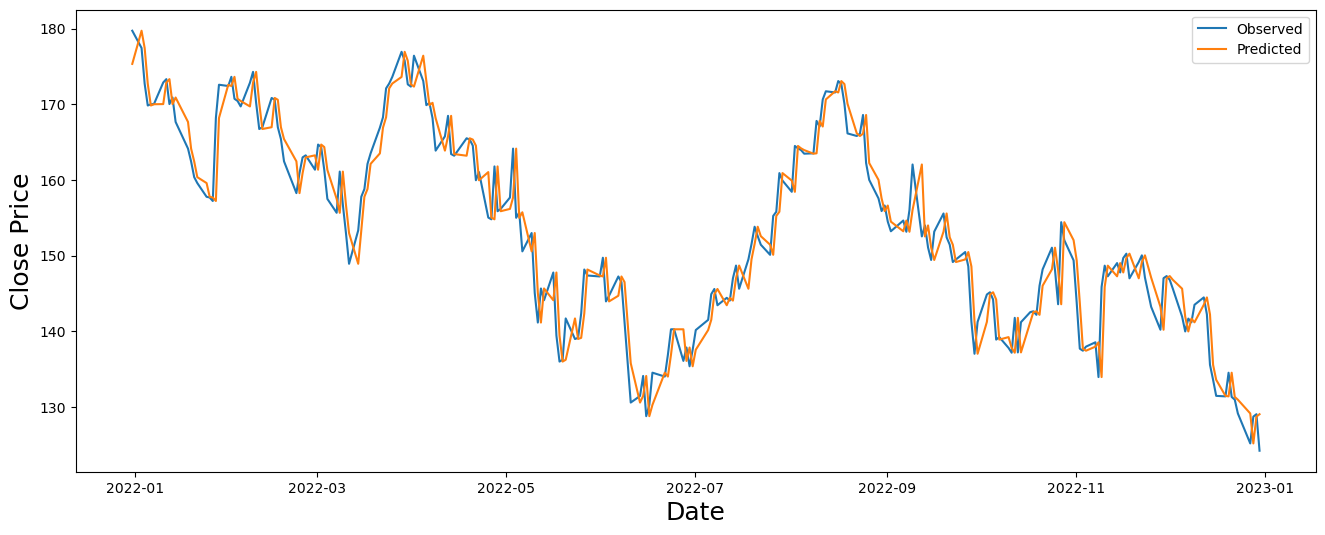

In [83]:
misc.plot(linear_model_N(1), Y_test)

Evaluate

In [86]:
import matplotlib.pyplot as plt

RMSEs = [0]
for n in range(1, 80):
    r2, mse, rmse, mae, mape = misc.evaluate(linear_model_N(n), Y_test)
    RMSEs.append(rmse)

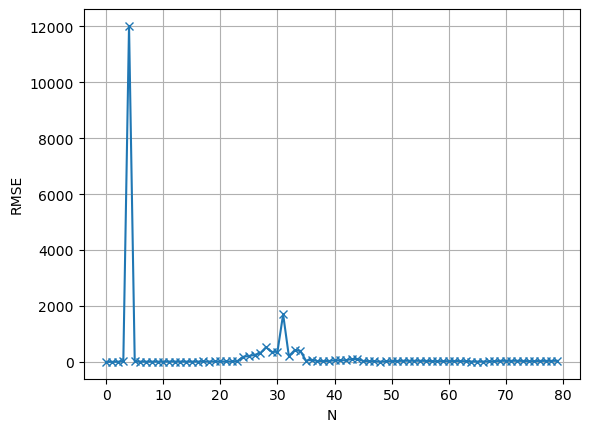

In [90]:
plt.plot(RMSEs, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
# plt.xlim([0, 10])
# plt.ylim([0, 50])
plt.show()

In [92]:
min(RMSEs[1:])

3.3886006200420464